In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import serial
import csv

from datetime import date
from datetime import datetime

## Resistance-temperature relation for each thermistor

#### Fluid temperature transducer

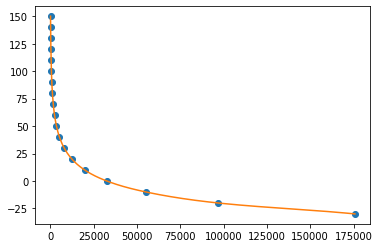

In [2]:
table_fluid = np.genfromtxt('transducers_data/Table_R-T_fluid_T_transducer.csv', delimiter=',', skip_header=1)

# compute LMS cubic regression
x, y = table_fluid[:, 1], table_fluid[:, 0]
fit_fluid = interp1d(x, y, 'cubic')

# check that f is a good approximation
x_new = np.linspace(x[-1], x[0], 1000)
y_new = fit_fluid(x_new)

plt.plot(x, y, 'o', x_new, y_new)
plt.show()

#### Surface temperature transducer

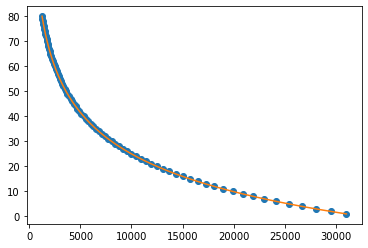

In [3]:
table_surface = np.genfromtxt('transducers_data/Table_R-T_surface_T_transducer.csv', delimiter=',', skip_header=1)

# compute LMS cubic regression
x, y = table_surface[:, 1], table_surface[:, 0]
fit_surface = interp1d(x, y, 'cubic')

# check that f is a good approximation
x_new = np.linspace(x[-1], x[0], 1000)
y_new = fit_surface(x_new)

plt.plot(x, y, 'o', x_new, y_new)
plt.show()

## Connection to Arduino and data collection

In [4]:
# Connect to Arduino port
serial = serial.Serial("/dev/ttyACM1", 9600)
print("Connected to Arduino port")

Connected to Arduino port


In [5]:
# Open the file and write the head
file_name = str(date.today())+"_"+datetime.now().strftime("%H:%M:%S")+".csv"

try:
    with open("analog_data/"+file_name, 'w', newline='') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow(["Time", "Time", "Resistance tube", "Resistance surface", "Temperature tube", "Temperature surface"])

        i = 1
        while True:
            row = serial.readline().decode("utf-8")
            R1 = float(row.split(",")[0])
            R2 = float(row.split(",")[1])
            writer.writerow([i, datetime.now().strftime("%H:%M:%S"), R1, R2, fit_fluid(R1), fit_surface(R2)])
            i+=1
            
except KeyboardInterrupt:
    print("Data collection is completed")

Data collection is completed
